## Load data

In [1]:
import mne

from neuracle_lib.readbdfdata import readbdfdata
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os
import re

def find_pinyin(file_path):

     # 读取文件（注意指定编码，防止乱码）
     with open(file_path, "r", encoding="gbk") as f:
          text = f.read()
          
     # 用正则匹配 Stimulus: 汉字 (拼音)
     # 匹配模式解释：
     #   Stimulus:\s* 匹配 "Stimulus: " 前缀
     #   .*?\((.*?)\) 捕获括号中的拼音
     pattern = r"Stimulus:\s*.*?\((.*?)\)"

     # 提取所有匹配结果
     pinyins = re.findall(pattern, text) 
     return pinyins 

In [2]:
root_path = "/localdata1/liuqi/data/"
path_name_list = ['20251030eeg-language/ck3',
    '20251030eeg-language/ck7',
    '20251030eeg-language/ck8',
    '20251030eeg-language/ck9',
    '20251030eeg-language/ck10',
    '20251030eeg-language/ck11',
    '20251030eeg-language/ck12']
path_name_list = [root_path + path for path in path_name_list]

log_path_list = ["20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck3.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck7.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck8.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck9.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck10.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck11.log",
"20251030eeg-language/psychopy_text_2025_10_30_cklog/psychopy_text_2025_10_30_ck12.log",
]

assert len(path_name_list) == len(log_path_list)
filename = ['data.bdf', 'evt.bdf']

# (M4)M1 - fix  - M2 - cue - M5 - fix  -M3 -reading - M5 - fix  - M3 -reading - M4(M1)
# (M4)M1 - 1.5S - M2 - 1s  - M5 - 0.8s -M3 - 1.2s   - M5 - 0.8s - M3 - 1.2s   - M4(M1)

PINYIN_TEXT   = ["mā", "má", "mǎ", "mà", "mī", "mí", "mǐ", "mì"]
rawData = {pinyin:[] for pinyin in PINYIN_TEXT}
marker_id = 3  # marker 3 对应 读音 刺激

tmin, tmax = 0, 1.2
for n in tqdm(range(len(path_name_list))):
    path_name = path_name_list[n]
    raw = readbdfdata(filename, [path_name])

    # 去工频（50 Hz）及其n阶谐波
    # raw.notch_filter(freqs=[n*50 for n in range(1, 9)]) 
    raw.notch_filter(freqs=[50, 100]) 
    # band filter
    raw.filter(l_freq=0.5, h_freq=40., picks='eeg', fir_design='firwin')
    raw.resample(sfreq=100)

    # get marker lists and raw data
    events, events_id = mne.events_from_annotations(raw)
    selected_channels = ["T7", "TP7", "FT7", "CP5", "F7", "F5", "FC5", "F3", "F4", "Fz", "FCz", "T8", "TP8", "FT8"]
    picks = selected_channels
    # picks = mne.pick_types(raw.info, emg=False, eeg=True, stim=False, eog=False,ecg=False)
    all_epochs = mne.Epochs(raw, events=events, event_id = 3, tmin=tmin, picks=picks,tmax=tmax,baseline=None, preload=True).get_data()
    
    # get pinyin labels
    labels = find_pinyin(root_path + log_path_list[n])[:24]
    # repeat 2 times for each pinyin
    labels = [x for x in labels for _ in range(2)]

    assert len(labels) == all_epochs.shape[0]
    for i in range(all_epochs.shape[0]):
        rawData[labels[i]].append(all_epochs[i])
        print(labels[i], end = ' ')
    print("\n")


  0%|          | 0/7 [00:00<?, ?it/s]

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck3/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 176999  =      0.000 ...   176.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=177000
    Range : 0 ... 176999 =      0.000 ...   176.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck3/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transitio

 14%|█▍        | 1/7 [00:02<00:14,  2.47s/it]

mī mī mā mā mī mī mǐ mǐ mā mā mī mī mí mí mì mì mí mí mà mà mì mì mì mì mí mí mǎ mǎ má má mà mà mǐ mǐ má má mǎ mǎ mà mà mǎ mǎ má má mǐ mǐ mā mā 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck7/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154999  =      0.000 ...   154.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=155000
    Range : 0 ... 154999 =      0.000 ...   154.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck7/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 165  =      0.000 ...   165.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (

 29%|██▊       | 2/7 [00:03<00:08,  1.68s/it]

mà mà mā mā mà mà mí mí mā mā mǎ mǎ mī mī mǎ mǎ mí mí mǐ mǐ mì mì mí mí mǐ mǐ mī mī mà mà má má mì mì mì mì mǎ mǎ mā mā mī mī má má mǐ mǐ má má 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck8/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 201999  =      0.000 ...   201.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=202000
    Range : 0 ... 201999 =      0.000 ...   201.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck8/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (

/home/liuqi/workspace/speech_decoding/neuracle_lib/readbdfdata.py:92: RuntimeWarning: Omitted 32 annotation(s) that were outside data range.
  annotationData = mne.io.read_raw_bdf(os.path.join(pathname[0], 'evt.bdf'), preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6601 samples (6.601 s)

Used Annotations descriptions: [np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5')]
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 121 original time points ...
0 bad epochs dropped


 43%|████▎     | 3/7 [00:05<00:07,  1.83s/it]

mì mì mì mì mā mā mī mī mà mà mǐ mǐ mí mí mǐ mǐ mà mà mǎ mǎ mǐ mǐ mà mà mā mā mí mí má má má má mī mī mā mā mī mī mǎ mǎ mí mí mì mì mǎ mǎ má má 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck9/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 168999  =      0.000 ...   168.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=169000
    Range : 0 ... 168999 =      0.000 ...   168.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck9/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (

 57%|█████▋    | 4/7 [00:06<00:04,  1.58s/it]

mí mí mǐ mǐ mì mì mā mā mī mī mī mī má má má má mà mà mā mā mì mì mà mà mì mì mǐ mǐ mà mà mí mí má má mǎ mǎ mí mí mǐ mǐ mī mī mǎ mǎ mā mā mǎ mǎ 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck10/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 162999  =      0.000 ...   162.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=163000
    Range : 0 ... 162999 =      0.000 ...   162.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck10/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design

 71%|███████▏  | 5/7 [00:07<00:02,  1.43s/it]

mí mí mǐ mǐ mà mà mī mī mī mī mī mī mà mà mǎ mǎ mā mā mǎ mǎ mì mì mā mā mí mí mí mí má má mì mì mǐ mǐ mā mā má má mǎ mǎ mà mà mì mì má má mǐ mǐ 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck11/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 164999  =      0.000 ...   164.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=165000
    Range : 0 ... 164999 =      0.000 ...   164.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck11/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design

 86%|████████▌ | 6/7 [00:09<00:01,  1.34s/it]

mā mā mī mī mǎ mǎ mǎ mǎ mí mí mā mā mà mà mí mí má má mì mì mí mí mì mì mā mā mǐ mǐ má má mǐ mǐ mī mī má má mì mì mǎ mǎ mī mī mǐ mǐ mà mà mà mà 

Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck12/data.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167999  =      0.000 ...   167.999 secs...
⚠️ 检测到未标定的Neuracle数据，执行缩放 (ADC→Volt)
Creating RawArray with float64 data, n_channels=64, n_times=168000
    Range : 0 ... 167999 =      0.000 ...   167.999 secs
Ready.
Extracting EDF parameters from /localdata1/liuqi/data/20251030eeg-language/ck12/evt.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 167  =      0.000 ...   167.000 secs...
mne version > 0.20
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design

100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

mì mì mí mí mǐ mǐ mǎ mǎ mī mī mā mā mā mā mǐ mǐ mī mī mì mì mǐ mǐ mà mà mā mā mà mà mí mí má má mì mì mǎ mǎ mī mī mǎ mǎ má má mí mí mà mà má má 



In [30]:
rawData['mā']

[array([[-3.50937823e-07, -4.53607519e-07, -6.26338460e-07, ...,
         -3.05352566e-08,  1.58768070e-08,  9.46577611e-08],
        [-3.31988551e-07, -4.89879081e-07, -6.11432011e-07, ...,
          1.17176536e-07,  1.60326943e-07,  1.65688151e-07],
        [-3.70694192e-07, -5.21287920e-07, -6.94480520e-07, ...,
         -9.64514927e-08, -1.06218305e-07,  2.26165476e-08],
        ...,
        [ 5.31490855e-07,  9.67452133e-08, -4.05357750e-07, ...,
         -2.35789186e-07,  1.88292456e-07,  3.68430947e-07],
        [ 6.12467484e-07,  2.47697710e-07, -2.05082673e-07, ...,
         -6.68346181e-08,  2.18942274e-07,  2.89674949e-07],
        [ 1.59940702e-07,  5.44478327e-07, -1.60402061e-07, ...,
         -5.31854537e-08, -7.14952372e-08, -1.57845622e-07]],
       shape=(14, 121)),
 array([[ 1.12782089e-08, -3.63167020e-08,  4.24710716e-08, ...,
          2.33857395e-07,  1.63044532e-07,  1.46112244e-07],
        [-4.89138093e-08, -1.49125903e-07,  1.29960471e-08, ...,
          1.23

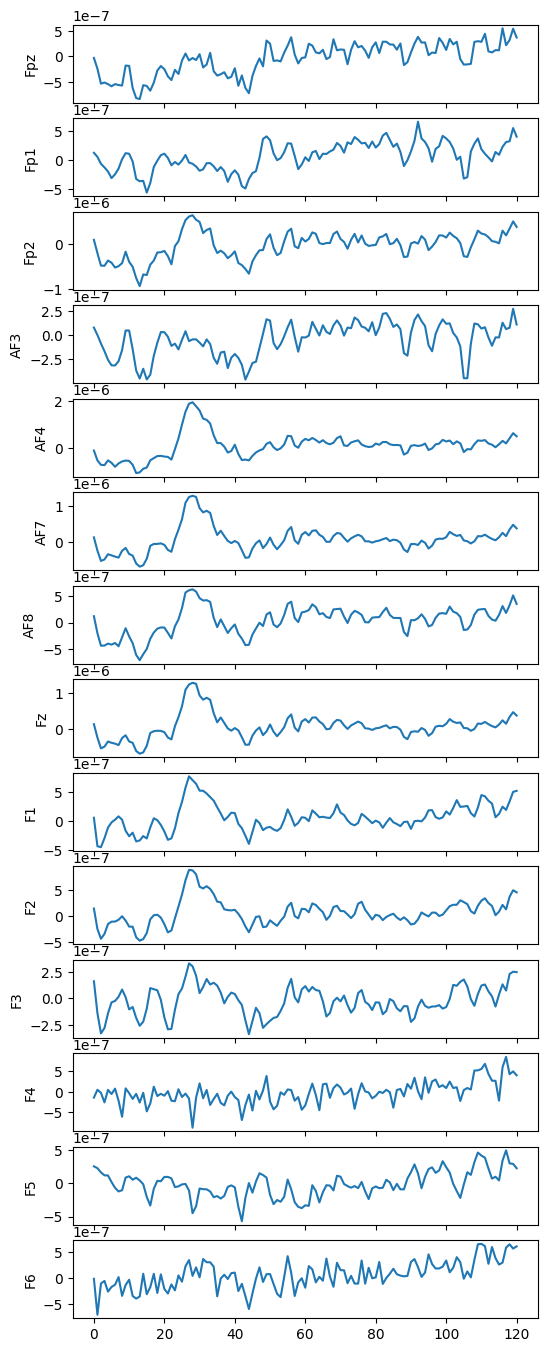

In [31]:
# 创建竖向子图
n_ch = len(rawData['má'][0])
channel_names = raw.info['ch_names']
fig, axes = plt.subplots(n_ch, 1, figsize=(6, 1.2 * n_ch), sharex=True)

for i, ax in enumerate(axes):
    ax.plot(rawData['mā'][3][i], color='tab:blue')
    ax.set_ylabel(channel_names[i])
plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt

PINYIN_TEXT   = ["mā", "má", "mǎ", "mà", "mī", "mí", "mǐ", "mì"]
for pinyin in tqdm(PINYIN_TEXT):
    # ====== 1️⃣ 提取并计算统计量 ======
    epochs = np.array(rawData[pinyin])              # shape: (n_epochs, n_channels, n_times)
    mean_wave = epochs.mean(axis=0)             # (n_channels, n_times)
    std_wave  = epochs.std(axis=0)              # (n_channels, n_times)
    # 如果你想画方差，可用 var_wave = epochs.var(axis=0)

    # ====== 2️⃣ 时间轴 ======
    sfreq = raw.info['sfreq']
    n_ch, n_times = mean_wave.shape
    times = np.arange(n_times) / sfreq
    channel_names = raw.info['ch_names'][:n_ch]

    # ====== 3️⃣ 绘制平均 ± 方差波形 ======
    fig, axes = plt.subplots(n_ch, 1, figsize=(6, 1.2 * n_ch), sharex=True)

    for i, ax in enumerate(axes):
        mean_uV = mean_wave[i] * 1e6       # 转为 µV 单位
        std_uV  = std_wave[i] * 1e6

        # 均值线
        ax.plot(times, mean_uV, color='tab:blue', linewidth=1.2, label='Mean')
        # ±标准差阴影区域
        ax.fill_between(times, mean_uV - std_uV, mean_uV + std_uV,
                        color='skyblue', alpha=0.4, label='±1 SD')
        # 基线
        ax.axhline(0, color='k', linestyle='--', linewidth=0.5)
        
        # 标签
        ax.set_ylabel(channel_names[i], rotation=0, labelpad=25, fontsize=8)
        ax.grid(True, linestyle='--', alpha=0.3)
        if i < n_ch - 1:
            ax.set_xticks([])
        else:
            ax.set_xlabel('Time (s)', fontsize=10)
        ax.set_ylim([-2,2])

    fig.suptitle(f"Average EEG Waveforms ± SD ({pinyin})", fontsize=14)
    plt.tight_layout()
    plt.savefig(f"output_pic/{pinyin}_Average EEG Waveforms.png")
    plt.close(fig) 



100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


In [33]:
data = raw.get_data()  # shape (n_channels, n_times)
print("min:", data.min(), "max:", data.max(), "std:", data.std())
# 通道名
print(raw.ch_names)

# 采样率
print(raw.info['sfreq'])

# 通道类型与单位
for ch in raw.info['chs'][:5]:  # 前5个
    print(ch['ch_name'], ch['unit'], ch['unit_mul'])

min: -0.01171875 max: 6.800611893821592e-06 std: 0.0017130891665686713
['Fpz', 'Fp1', 'Fp2', 'AF3', 'AF4', 'AF7', 'AF8', 'Fz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FCz', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FT7', 'FT8', 'Cz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'T7', 'T8', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'TP7', 'TP8', 'Pz', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POz', 'PO3', 'PO4', 'PO5', 'PO6', 'PO7', 'PO8', 'Oz', 'O1', 'O2', 'ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL']
100.0
Fpz 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
Fp1 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
Fp2 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
AF3 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)
AF4 107 (FIFF_UNIT_V) 0 (FIFF_UNITM_NONE)


In [34]:
# 取出第一个epoch数据
data = np.hstack(rawData['mā'] ) # shape (n_channels, n_times)
print(data.shape)
print("Data shape:", data.shape)

# 匹配info
info = mne.pick_info(raw.info, mne.pick_types(raw.info, eeg=True))
print("EEG channels:", len(info['ch_names']))

# 检查维度一致性
if data.shape[0] != len(info['ch_names']):
    raise ValueError(f"通道数不匹配: data={data.shape[0]} vs info={len(info['ch_names'])}")

# 构建Raw对象
testRaw = mne.io.RawArray(data, info)

# 设置标准10-20电极位置信息 'standard_1020' "easycap-M1"
montage = mne.channels.make_standard_montage('standard_1020')
testRaw.set_montage(montage, match_case=False, on_missing='warn')

# 检查是否有坏道
zero_chs = [ch for ch in testRaw.ch_names if np.allclose(testRaw.get_data(picks=ch), 0)]
if zero_chs:
    testRaw.info['bads'].extend(zero_chs)
    print("检测到坏道:", zero_chs)

# # 绘制PSD与原始波形
# testRaw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
# testRaw.plot(duration=5, n_channels=30)
testRaw.set_eeg_reference('average', projection=False)
# testRaw.filter(0.5, 40., fir_design='firwin')
testRaw.compute_psd(fmax=40).plot()

(14, 5082)
Data shape: (14, 5082)
EEG channels: 59


ValueError: 通道数不匹配: data=14 vs info=59

In [ ]:
testRaw

<RawArray | 59 x 5082 (50.8 s), ~2.4 MiB, data loaded>

Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective wind

<Figure size 640x480 with 0 Axes>

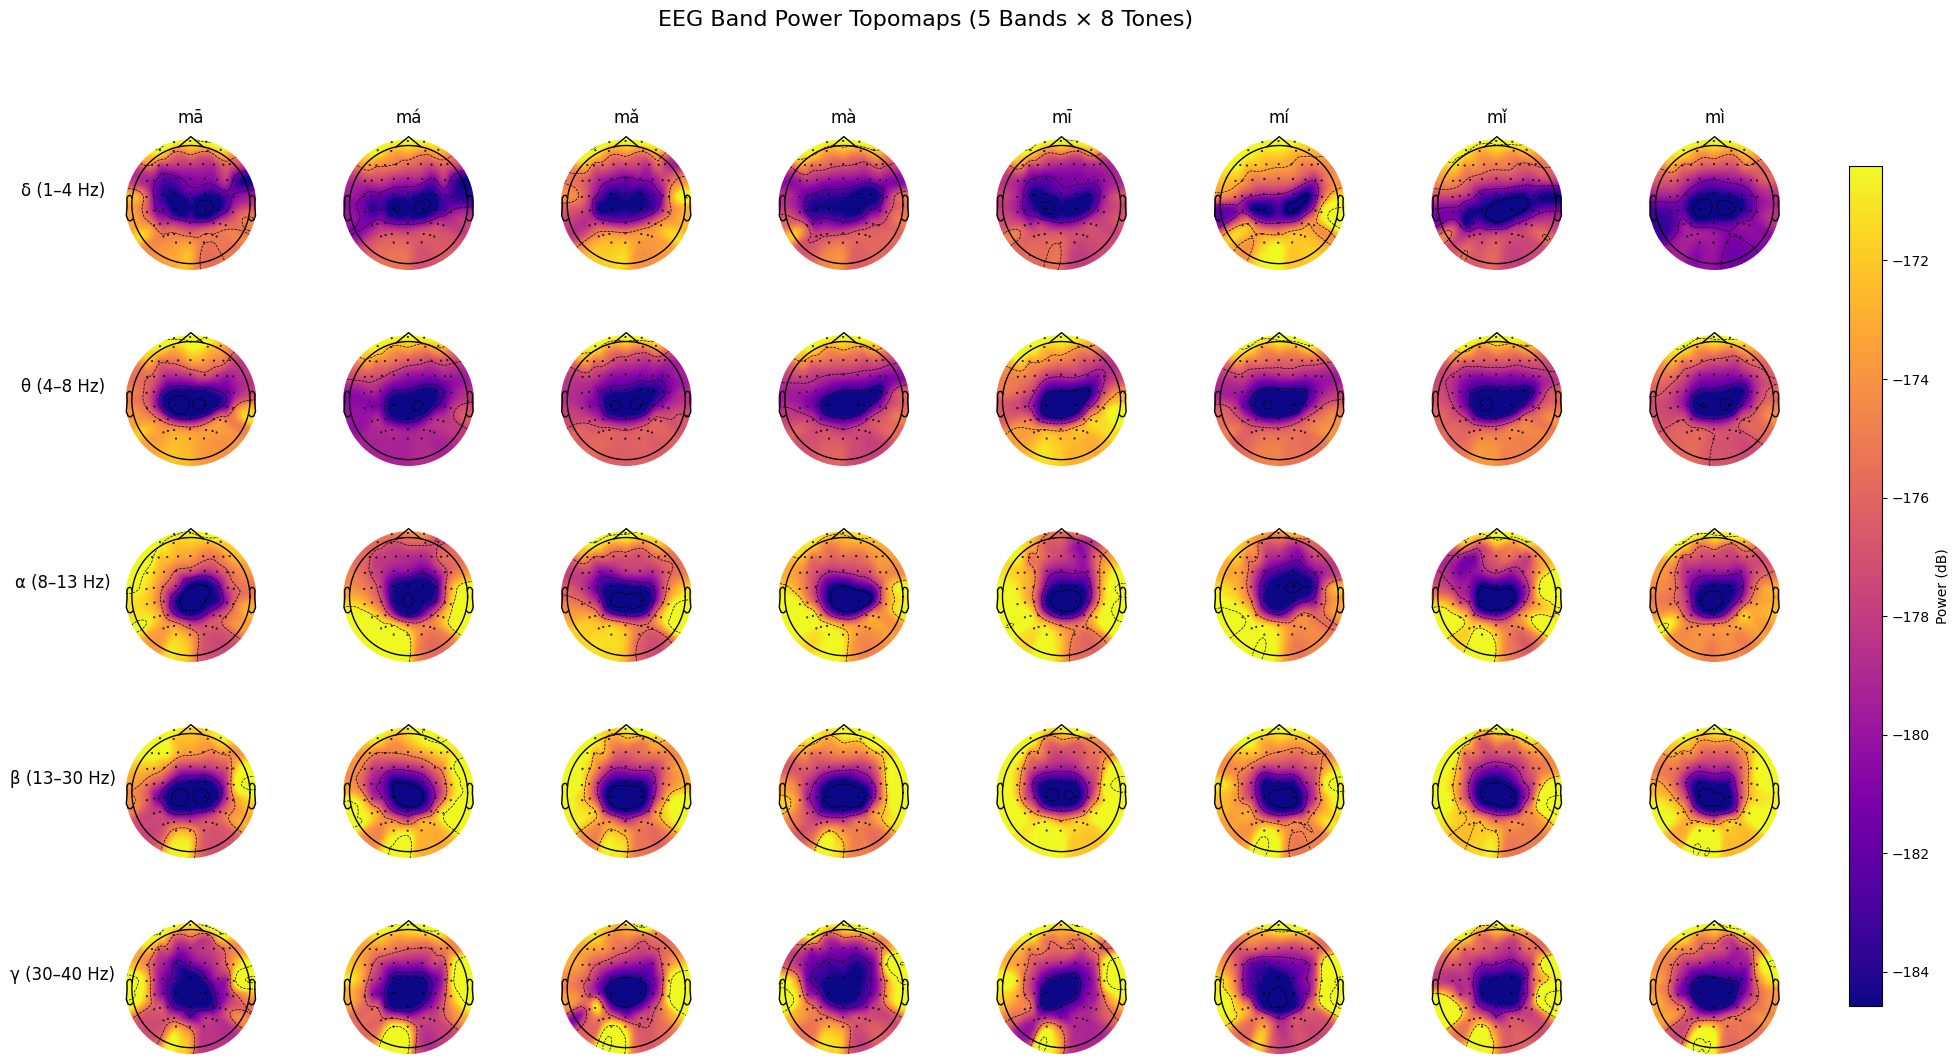

In [39]:
pinyins = ["mā", "má", "mǎ", "mà", "mī", "mí", "mǐ", "mì"]

# 定义四个经典脑电频段
bands = {
    'δ (1–4 Hz)': (1, 4),
    'θ (4–8 Hz)': (4, 8),
    'α (8–13 Hz)': (8, 13),
    'β (13–30 Hz)': (13, 30),
    'γ (30–40 Hz)': (30, 40)
}

# 排除非EEG通道
picks = mne.pick_types(raw.info, emg=False, eeg=True, stim=False, eog=False,ecg=False,exclude='bads')
info_eeg = mne.pick_info(testRaw.info, picks)

# 创建图形窗口（5 行 8 列）
plt.clf()
fig, axes = plt.subplots(len(bands), len(pinyins), figsize=(22, 12))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

# 遍历频段 × 声调
for i, (band_name, (fmin, fmax)) in enumerate(bands.items()):
    for j, pinyin in enumerate(pinyins):
        ax = axes[i, j]
        # 获取该声调的 epochs 并计算平均
        epochs = np.stack(rawData[pinyin], axis=0)     # (n_epochs, n_channels, n_times)
        mean_data = epochs.mean(axis=0)                # (n_channels, n_times)
        
        # 转成临时 RawArray 计算 PSD
        temp_raw = mne.io.RawArray(mean_data, info_eeg, verbose=False)
        psd = temp_raw.compute_psd(fmin=fmin, fmax=fmax, picks=picks, method='welch')
        psd_data = psd.get_data()                      # (n_channels, n_freqs)
        band_power = psd_data.mean(axis=1)             # 平均功率 (n_channels,)
        band_power_db = 10 * np.log10(band_power)      # 转换为 dB

        # 绘制 topomap
        im, _ = mne.viz.plot_topomap(
            band_power_db, info_eeg,
            axes=ax, show=False,
            cmap='plasma', contours=3,
            vlim=(np.percentile(band_power_db, 5),
                  np.percentile(band_power_db, 95))
        )

        # 标签：顶部写声调，左侧写频段
        if i == 0:
            ax.set_title(pinyin, fontsize=12, pad=5)
        if j == 0:
            ax.set_ylabel(band_name, fontsize=12, rotation=0, labelpad=45)

# 添加 colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label='Power (dB)')

fig.suptitle("EEG Band Power Topomaps (5 Bands × 8 Tones)", fontsize=16, y=0.98)
plt.show()


Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective wind

<Figure size 640x480 with 0 Axes>

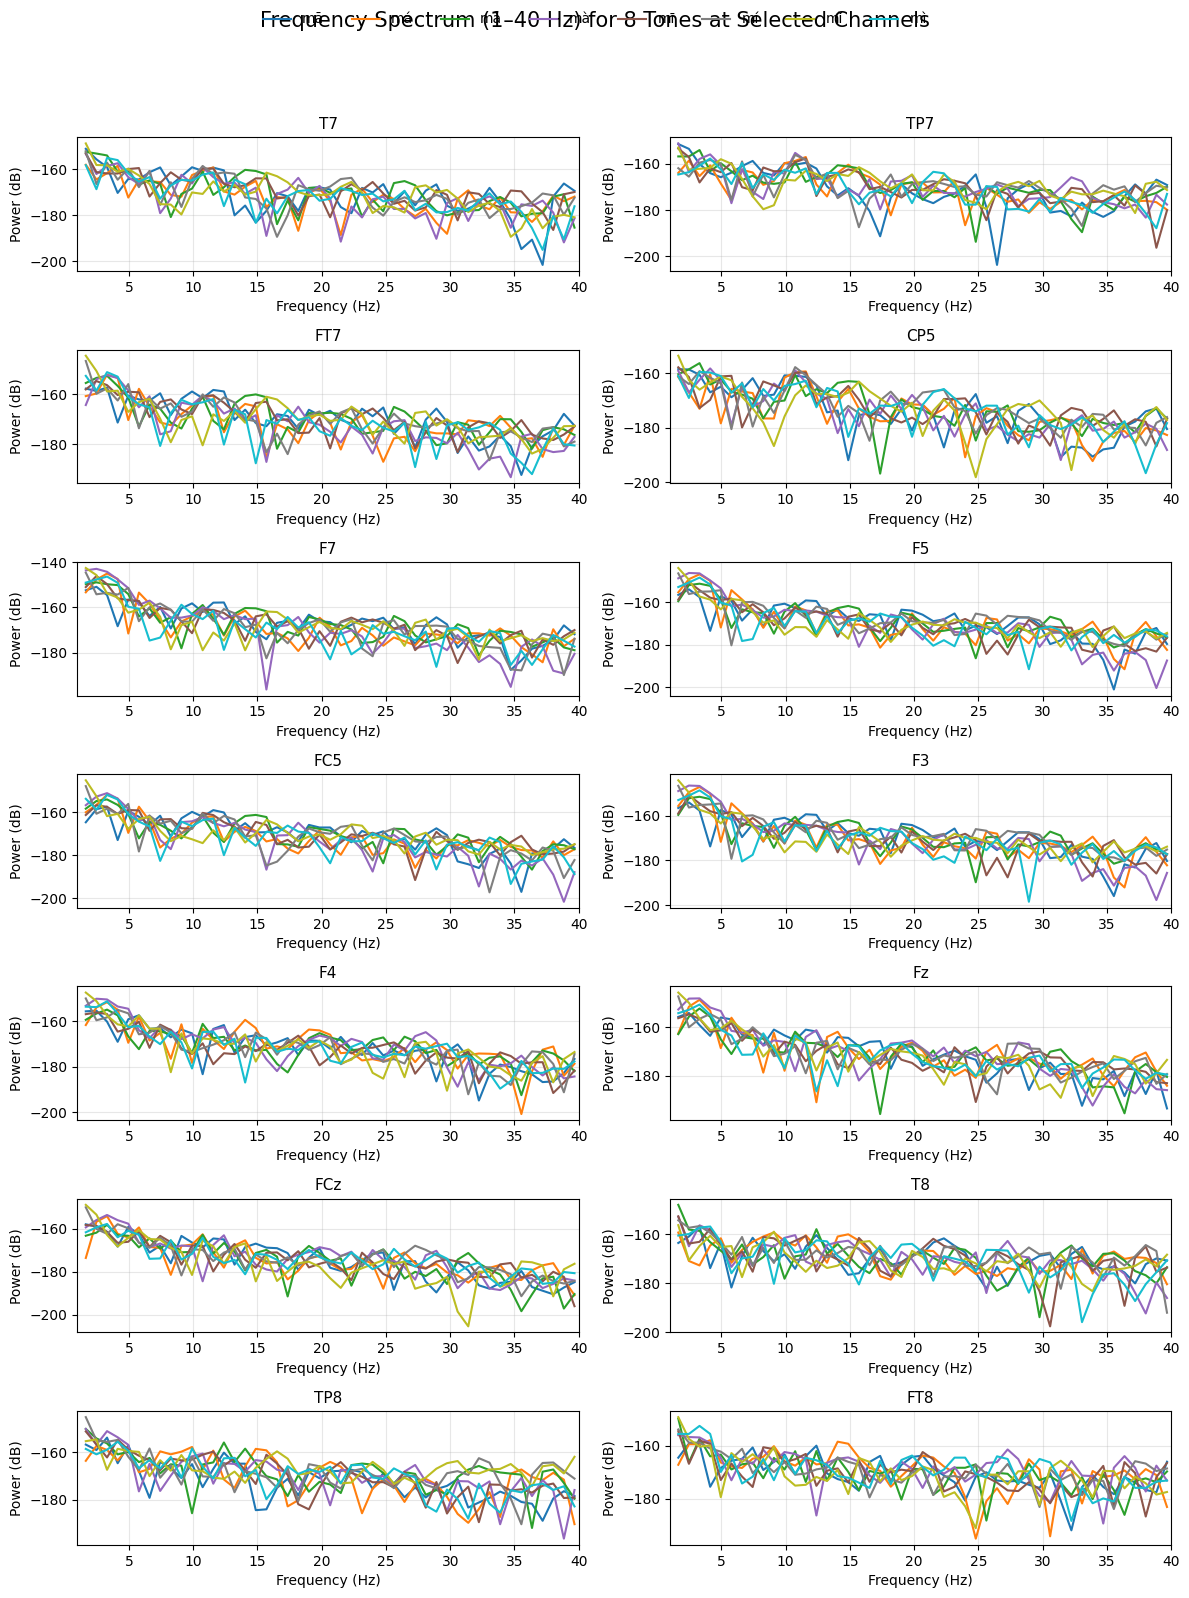

In [ ]:
# 八个声调
pinyins = ["mā", "má", "mǎ", "mà", "mī", "mí", "mǐ", "mì"]

# 选定感兴趣通道
target_channels = ["T7", "TP7", "FT7", "CP5", "F7", "F5", "FC5",
                   "F3", "F4", "Fz", "FCz", "T8", "TP8", "FT8"]

# 排除非EEG通道
picks = mne.pick_types(raw.info, emg=False, eeg=True, stim=False, eog=False,ecg=False,exclude='bads')
info_eeg = mne.pick_info(testRaw.info, picks)

# 颜色映射（8个声调）
colors = plt.cm.tab10(np.linspace(0, 1, len(pinyins)))

# 创建子图 (14通道)
plt.clf()
fig, axes = plt.subplots(7, 2, figsize=(12, 16))  # 7行×2列
axes = axes.flatten()

for idx, ch_name in enumerate(target_channels):
    ax = axes[idx]

    # 获取该通道索引
    ch_idx = info_eeg.ch_names.index(ch_name)

    for pinyin, color in zip(pinyins, colors):
        # 聚合该声调所有epoch
        epochs = np.stack(rawData[pinyin], axis=0)  # (n_epochs, n_channels, n_times)
        mean_data = epochs.mean(axis=0)             # (n_channels, n_times)
        
        # 创建临时 RawArray
        temp_raw = mne.io.RawArray(mean_data, info_eeg, verbose=False)

        # 计算 PSD
        psd = temp_raw.compute_psd(fmin=1, fmax=40, picks=[ch_name], method='welch')
        psd_data = psd.get_data()[0]   # 该通道功率谱
        freqs = psd.freqs

        ax.plot(freqs, 10 * np.log10(psd_data), color=color, label=pinyin)

    ax.set_title(ch_name, fontsize=11)
    ax.set_xlim(1, 40)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power (dB)")
    ax.grid(alpha=0.3)

# 统一图例
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=8, frameon=False)
fig.suptitle("Frequency Spectrum (1–40 Hz) for 8 Tones at Selected Channels", fontsize=15, y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)


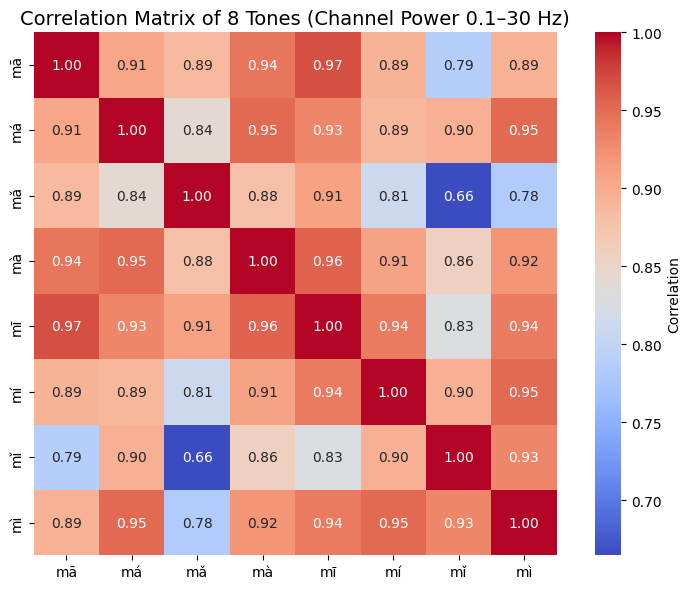

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne

# 八个声调
pinyins = ["mā", "má", "mǎ", "mà", "mī", "mí", "mǐ", "mì"]

# 排除非EEG通道
picks = mne.pick_types(raw.info, emg=False, eeg=True, stim=False, eog=False,ecg=False,exclude='bads')
info_eeg = mne.pick_info(testRaw.info, picks)

# 选择分析频段（比如 1–30 Hz）
fmin, fmax = 0.1, 30

# 计算每个声调的通道功率特征
tone_features = []
for pinyin in pinyins:
    epochs = np.stack(rawData[pinyin], axis=0)   # (n_epochs, n_channels, n_times)
    mean_data = epochs.mean(axis=0)              # (n_channels, n_times)
    temp_raw = mne.io.RawArray(mean_data, info_eeg, verbose=False)
    psd = temp_raw.compute_psd(fmin=fmin, fmax=fmax, picks=picks, method='welch')
    psd_data = psd.get_data()                    # (n_channels, n_freqs)
    band_power = psd_data.mean(axis=1)           # (n_channels,)
    band_power_db = 10 * np.log10(band_power)
    tone_features.append(band_power_db)

tone_features = np.array(tone_features)  # (8声调, n_channels)

# 计算声调间相关性
corr_matrix = np.corrcoef(tone_features)  # (8×8)

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=pinyins, yticklabels=pinyins,
            square=True, cbar_kws={'label': 'Correlation'})
plt.title(f"Correlation Matrix of 8 Tones (Channel Power {fmin}–{fmax} Hz)", fontsize=14)
plt.tight_layout()
plt.show()


li两个发音能量显著性

Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)
Effective window size : 1.210 (s)


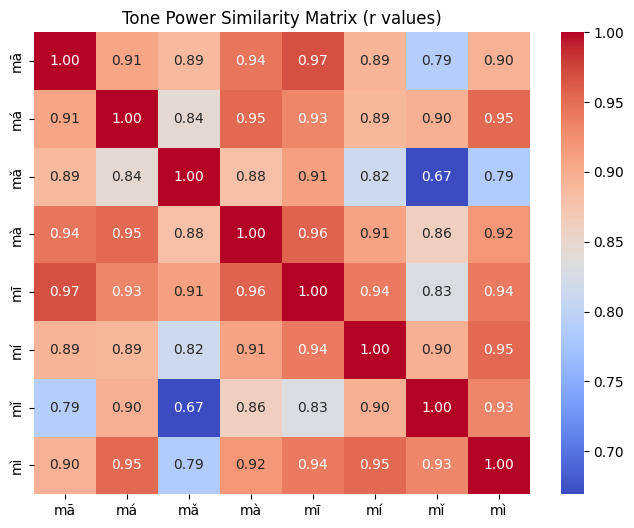

T-test result: t=1.243, p=0.11257


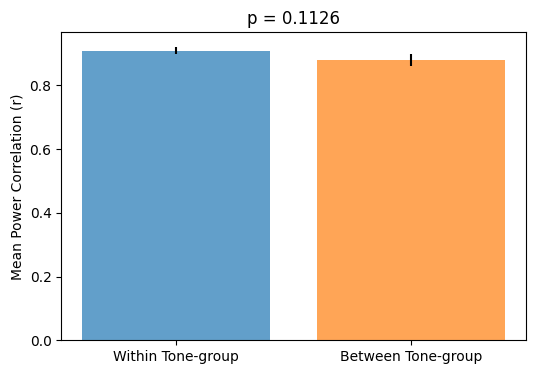

In [ ]:
import numpy as np
import mne
from scipy.stats import ttest_ind, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

pinyins = ["mā", "má", "mǎ", "mà", "mī", "mí", "mǐ", "mì"]
# groups = [["mā","mī"], ["má","mí"], ["mǎ","mǐ"], ["mà","mì"]]  # 两组音调
groups = [["mā", "má", "mǎ", "mà"], ["mī", "mí", "mǐ", "mì"]]  # 两组音调

exclude_chs = ["ECG", "HEOR", "HEOL", "VEOU", "VEOL"]
picks = [ch for ch in testRaw.info["ch_names"] if ch not in exclude_chs]
info_eeg = mne.pick_info(testRaw.info, mne.pick_channels(testRaw.info["ch_names"], picks))

fmin, fmax = 0.1, 40
tone_features = {}

for p in pinyins:
    epochs = np.stack(rawData[p], axis=0)
    mean_data = epochs.mean(axis=0)
    temp_raw = mne.io.RawArray(mean_data, info_eeg, verbose=False)
    psd = temp_raw.compute_psd(fmin=fmin, fmax=fmax, picks=picks, method="welch")
    psd_data = psd.get_data()
    band_power = psd_data.mean(axis=1)
    tone_features[p] = 10 * np.log10(band_power)

# 构建相似性矩阵
corr_mat = np.zeros((len(pinyins), len(pinyins)))
for i, p1 in enumerate(pinyins):
    for j, p2 in enumerate(pinyins):
        corr, _ = pearsonr(tone_features[p1], tone_features[p2])
        corr_mat[i, j] = corr

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=pinyins, yticklabels=pinyins)
plt.title("Tone Power Similarity Matrix (r values)")
plt.show()


# 获取同类音之间的相关性（within-group）
within_corr = []
between_corr = []

for group in groups:
    idx = [pinyins.index(p) for p in group]
    for i in idx:
        for j in idx:
            if i < j:
                within_corr.append(corr_mat[i, j])

# 获取不同组之间的相关性
for i, p1 in enumerate(pinyins):
    for j, p2 in enumerate(pinyins):
        if i < j and ((p1 in groups[0] and p2 in groups[1]) or (p1 in groups[1] and p2 in groups[0])):
            between_corr.append(corr_mat[i, j])

within_corr = np.array(within_corr)
between_corr = np.array(between_corr)

t_stat, p_value = ttest_ind(within_corr, between_corr, alternative="greater")
print(f"T-test result: t={t_stat:.3f}, p={p_value:.5f}")

plt.figure(figsize=(6,4))
plt.bar(["Within Tone-group", "Between Tone-group"],
        [within_corr.mean(), between_corr.mean()],
        yerr=[within_corr.std()/np.sqrt(len(within_corr)),
              between_corr.std()/np.sqrt(len(between_corr))],
        color=["tab:blue", "tab:orange"], alpha=0.7)
plt.ylabel("Mean Power Correlation (r)")
plt.title(f"p = {p_value:.4f}")
plt.show()

In [5]:
# save rawData

np.save( 'speech_decoding_epochs-14-channels.npy',rawData)
print('save done!')

save done!


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from umap import UMAP
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# ---------------------------
# 1️⃣ 加载你的数据
# ---------------------------
# 假设 data_dict 的格式为 {class_label: np.ndarray(samples, channels, timepoints)}
# 例如：{1: array(...), 2: array(...)}
data_dict = np.load("speech_decoding_epochs-14-channels.npy", allow_pickle=True).item()  # 如果你保存成npy
for k in data_dict:
    data_dict[k] = np.array(data_dict[k])

channel_names = raw.info['ch_names']
selected_channels = ["T7", "TP7", "FT7", "CP5", "F7", "F5", "FC5", "F3", "F4", "Fz", "FCz", "T8", "TP8", "FT8"]

42
42
42
42
42
42
42
42
Data shape: (336, 1694) Labels: [0 1 2 3 4 5 6 7]


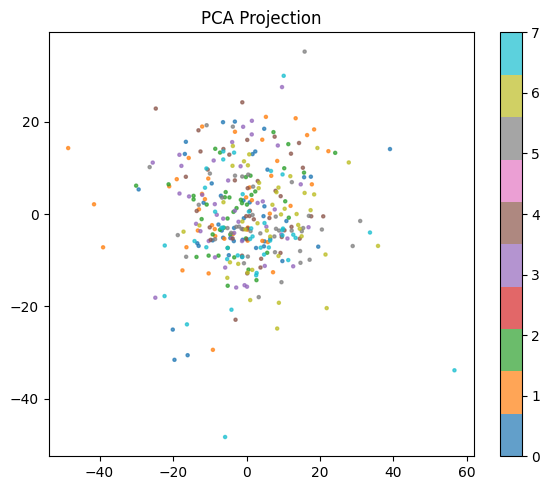

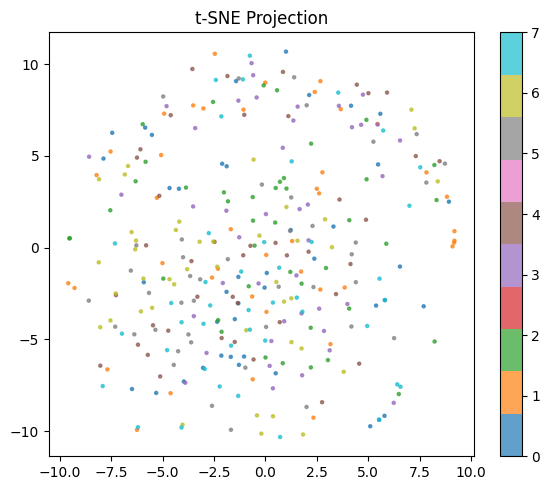

/home/liuqi/.conda/envs/sleep/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


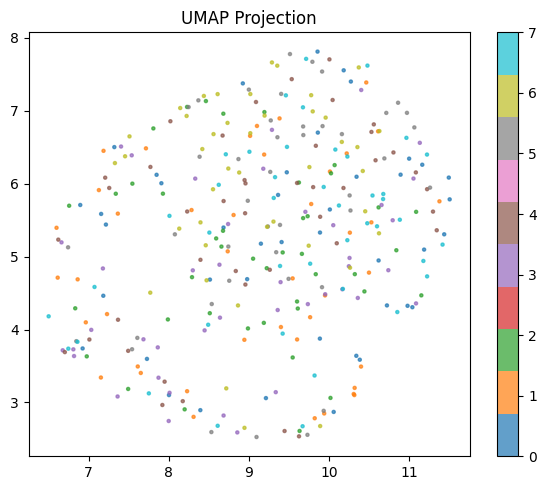

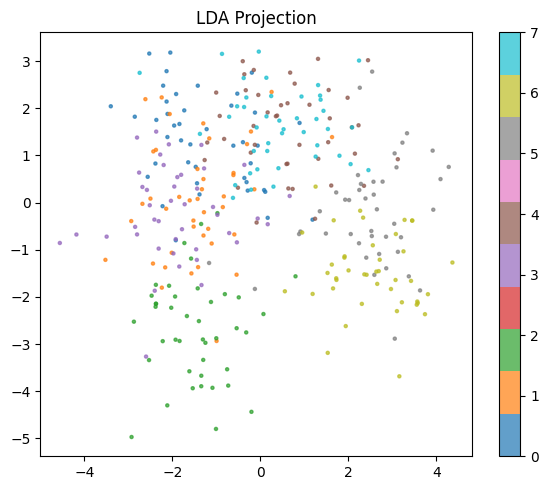


SVM (RBF) Accuracy: 0.2353
              precision    recall  f1-score   support

           0      0.111     0.286     0.160         7
           1      1.000     0.154     0.267        13
           2      0.250     0.222     0.235         9
           3      0.286     0.500     0.364         8
           4      0.000     0.000     0.000         8
           5      0.214     0.750     0.333         4
           6      0.286     0.250     0.267         8
           7      1.000     0.091     0.167        11

    accuracy                          0.235        68
   macro avg      0.393     0.282     0.224        68
weighted avg      0.477     0.235     0.219        68


Random Forest Accuracy: 0.1765
              precision    recall  f1-score   support

           0      0.125     0.143     0.133         7
           1      0.400     0.154     0.222        13
           2      0.125     0.111     0.118         9
           3      0.154     0.250     0.190         8
           4      

In [7]:
# 构造样本与标签
X_list, y_list = [], []
for label, arr in data_dict.items():
    n_samples = arr.shape[0]
    print(n_samples)
    X_list.append(arr.reshape(n_samples, -1))  # 展开每个样本
    y_list.append(np.full(n_samples, label))

X = np.vstack(X_list)
y = np.concatenate(y_list)

mapping  = {"mā":0, "má":1, "mǎ":2, "mà":3, "mī":4, "mí":5, "mǐ":6, "mì":7}
f = np.vectorize(lambda x: mapping[x])
y = f(y)
print("Data shape:", X.shape, "Labels:", np.unique(y))

# ---------------------------
# 2️⃣ 预处理
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 3️⃣ 降维与可视化
# ---------------------------
def plot_embedding(embedding, title, labels):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap="tab10", s=5, alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plot_embedding(X_pca, "PCA Projection", y)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plot_embedding(X_tsne, "t-SNE Projection", y)

# UMAP
umap_model = UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
plot_embedding(X_umap, "UMAP Projection", y)

# LDA (必须有标签监督)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
plot_embedding(X_lda, "LDA Projection", y)

# ---------------------------
# 4️⃣ 分类性能测试
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = { "SVM (RBF)": SVC(kernel='rbf', C=1.0), 
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42), 
          "KNN": KNeighborsClassifier(n_neighbors=5), 
          "Logistic Regression": LogisticRegression(max_iter=500) }

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, digits=3))


# ---------------------------
# 5️⃣ 可选：交叉验证
# ---------------------------
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, n_jobs=64)
    print(f"{name} CV mean acc: {scores.mean():.4f} ± {scores.std():.4f}")
    

In [ ]:

# 构造样本与标签
X_list, y_list = [], []
for label, arr in data_dict.items():
    n_samples = arr.shape[0]
    print(n_samples)
    X_list.append(arr.reshape(n_samples, -1))  # 展开每个样本
    y_list.append(np.full(n_samples, label))

X = np.vstack(X_list)
y = np.concatenate(y_list)

mapping  = {"mā":0, "má":1, "mǎ":2, "mà":3, "mī":4, "mí":5, "mǐ":6, "mì":7}
f = np.vectorize(lambda x: mapping[x])
y = f(y)
print("Data shape:", X.shape, "Labels:", np.unique(y))

# ---------------------------
# 2️⃣ 预处理
# ---------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# 3️⃣ 降维与可视化
# ---------------------------
def plot_embedding(embedding, title, labels):
    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap="tab10", s=5, alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plot_embedding(X_pca, "PCA Projection", y)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plot_embedding(X_tsne, "t-SNE Projection", y)

# UMAP
umap_model = UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)
plot_embedding(X_umap, "UMAP Projection", y)

# LDA (必须有标签监督)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
plot_embedding(X_lda, "LDA Projection", y)

# ---------------------------
# 4️⃣ 分类性能测试
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    # 🌸 Support Vector Machines
    "SVM (Linear, C=1.0)": SVC(kernel='linear', C=1.0, probability=True),
    "SVM (RBF, C=1.0, gamma=scale)": SVC(kernel='rbf', C=1.0, gamma='scale', probability=True),
    "SVM (Poly, degree=3)": SVC(kernel='poly', degree=3, C=1.0, gamma='scale', coef0=1, probability=True),

    # 🌲 Decision Trees & Random Forests
    "Decision Tree (max_depth=8)": DecisionTreeClassifier(max_depth=8, random_state=42),
    "Random Forest (n=200, depth=10)": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Extra Trees (n=200)": ExtraTreesClassifier(n_estimators=200, random_state=42),

    # 🔥 Gradient Boosting Family
    "Gradient Boosting (lr=0.05, depth=3)": GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=200),
    "AdaBoost (n=200)": AdaBoostClassifier(n_estimators=200, random_state=42),
    "XGBoost (depth=4, lr=0.1)": XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=300, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM (num_leaves=31, lr=0.1)": LGBMClassifier(num_leaves=31, learning_rate=0.1, n_estimators=200, random_state=42),

    # 📈 Linear Models
    "Logistic Regression (L2, C=1.0)": LogisticRegression(max_iter=500, penalty='l2', solver='lbfgs'),
    "Ridge Classifier (alpha=1.0)": RidgeClassifier(alpha=1.0),
    "SGD Classifier (hinge, alpha=0.0001)": SGDClassifier(loss='hinge', alpha=0.0001, max_iter=1000, tol=1e-3, random_state=42),

    # 🧠 Neural Network
    "MLP (hidden=(100,), relu, alpha=1e-4)": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=1e-4, max_iter=500, random_state=42),

    # 📚 Probabilistic Models
    "Gaussian NB": GaussianNB(),
    "LDA (shrinkage=auto)": LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'),
    "QDA": QuadraticDiscriminantAnalysis(),

    # 👣 Nearest Neighbors
    "KNN (k=5, metric=euclidean)": KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    "KNN (k=7, metric=manhattan)": KNeighborsClassifier(n_neighbors=7, metric='manhattan')
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, digits=3))


# ---------------------------
# 5️⃣ 可选：交叉验证
# ---------------------------
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, n_jobs=64)
    print(f"{name} CV mean acc: {scores.mean():.4f} ± {scores.std():.4f}")
    



In [ ]:
from joblib import Parallel, delayed
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# ---------------------------
# 并行训练 + 评估
# ---------------------------

def train_and_evaluate(name, model, X_train, X_test, y_train, y_test):
    """单模型训练与测试"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=3)
    return name, acc, report

# 并行执行所有模型
results = Parallel(n_jobs=-1, backend='loky', verbose=10)(
    delayed(train_and_evaluate)(name, model, X_train, X_test, y_train, y_test)
    for name, model in models.items()
)

# 打印结果
for name, acc, report in results:
    print(f"\n✅ {name} Accuracy: {acc:.4f}")
    print(report)

# ---------------------------
# 多进程交叉验证
# ---------------------------

def cross_validate_model(name, model, X, y):
    scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)
    return name, np.mean(scores), np.std(scores)

cv_results = Parallel(n_jobs=-1, backend='loky', verbose=10)(
    delayed(cross_validate_model)(name, model, X_scaled, y)
    for name, model in models.items()
)

# 打印交叉验证结果
print("\n📊 Cross-validation summary:")
for name, mean_acc, std_acc in cv_results:
    print(f"{name}: {mean_acc:.4f} ± {std_acc:.4f}")


In [ ]:
5折  通道筛选   前额叶不要（眨眼） O枕叶不要（无关） T P 
样本量
ppt 降维 数据增广 

画图固定 y lim tick